Name 1: Alice Chase<br/>
Student id 1: 7007281<br/>
Email 1: alch00001@stud.uni-saarland.de<br/>


Name 2: Kushagra Sharma<br/>
Student id 2: 7010529<br/>
Email 2: kush00001@stud.uni-saarland.de<br/>  

## **1 Data Preparation**

In [ ]:
#Preprocessing Function

import string
from string import punctuation
import re

file = open("data/bengali_corpus.txt", "r") #alternatively file = open("data/alice_in_wonderland.txt", "r")
text = file.read()

#PREPROCESS
text = text.lower()
text = re.sub(r'\d+', '', text) #remove numbers
text= re.sub(r'[a-zA-Z]', '', text) #only for Bengali to remove English characters
text = re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)
text = re.sub(' +', ' ', text) #formatting; remove extra spaces
text = text.replace('\n', " ") 
text =  re.split('[!?.।]', text) # । is a sentence marker in Bengali
sentences = [s.translate(str.maketrans('', '', string.punctuation)) for s in text] #parse into setnences

#SPLIT INTO TEST AND TRAIN
train_size = int(0.8*len(sentences)) #80% for train
test_size = len(sentences)-train_size #remainder for test
train = sentences[:train_size]
test = sentences[train_size:]

#SAVE TO TEST AND TRAIN FILES
textfile = open("data/bengali_train.txt", "w") #alternatively: textfile = open("alice_train.txt", "w")
for s in train:
    textfile.write(s + "\n")
textfile.close()

textfile = open("data/bengali_test.txt", "w") #textfile = open("alice_test.txt", "w")
for s in test:
    textfile.write(s + "\n")
textfile.close()

## **2 Subword Segmentation**

**Bengali char-segmented sample output:** \\
▁ য ত ্ ত স ব ▁ প া প ন ▁ শ া ল ার ▁ ফ া জ ল া ম ী
▁ প া প ন ▁ শ া ল া ▁ র ে ▁ র ি ম া ন ্ ড ে ▁ ন ে ও য় া ▁ দ র ক ার জ ি ল ্ ল ু র ▁ র হ ম া ন ▁ স ্ য ার ে র ▁ ছ ে ল ে ▁ এ ত ো ▁ ব ড ় ▁ জ ার জ ▁ হ ব ে ▁ এ ট া ▁ এ ক ট া ▁ দ ে শ ে র ▁ ম া ন ু ষ ▁ক ো ন ো ▁ দ ি ন ▁ ও ▁ ভ া ব ত ে ▁ প ার ে ন ি \\
**Bengali 300-segmented sample output:** \\
▁য ত ্ত সব ▁পাপন ▁শ ালার ▁ফা জ লাম ী
▁পাপন ▁শ ালা ▁ রে ▁র ি মান ্ ড ে ▁নে ওয়া ▁দরকার জ ি ল্ ল ুর ▁র হ মান ▁স ্য ার ের ▁ছে লে ▁এ তো ▁ব ড় ▁জ ার জ ▁হবে ▁এ টা ▁একটা ▁দেশ ের ▁মানুষ ▁কোন ো ▁দি ন ▁ও ▁ভ া ব তে ▁প ারে নি \\
**Bengali 2300-segmented sample output:** \\
▁যত ্ত সব ▁পাপন ▁শালার ▁ফা জ লাম ী
▁পাপন ▁শালা ▁রে ▁রিমান্ডে ▁নেওয়া ▁দরকার জি ল্ ল ুর ▁রহমান ▁স্যারের ▁ছেলে ▁এতো ▁বড় ▁জারজ ▁হবে ▁এটা ▁একটা ▁দেশের ▁মানুষ ▁কোনো ▁দিন ▁ও ▁ভাব তে ▁পারে নি \\

**English char-segmented sample output:** \\
▁ i ▁ s h a l l ▁ b e ▁ l a t e ▁ w h e n ▁ s h e ▁ t h o u g h t ▁ i t ▁ o v e r ▁ a f t e r w a r d s ▁ i t ▁ o c c u r r e d ▁ t o ▁ h e r ▁ t h a t ▁ s h e ▁ o u g h t ▁ t o ▁ h a v e ▁ w o n d e r e d ▁ a t ▁ t h i s ▁ b u t ▁ a t ▁ t h e ▁ t i m e ▁ i t ▁ a l l ▁ s e e m e d ▁ q u i t e ▁ n a t u r a l\\
**English 500-segmented sample output:** \\
▁i ▁sha ll ▁be ▁l at e ▁when ▁she ▁thought ▁it ▁over ▁after w ard s ▁it ▁o c c ur red ▁to ▁her ▁that ▁she ▁ ought ▁to ▁have ▁wonder ed ▁at ▁this ▁but ▁at ▁the ▁time ▁it ▁all ▁seemed ▁quite ▁n at ur al \\
**English 2500-segmented sample output:** \\
▁i ▁shall ▁be ▁late ▁when ▁she ▁thought ▁it ▁over ▁after wards ▁it ▁occurred ▁to ▁her ▁that ▁she ▁ought ▁to ▁have ▁wonder ed ▁at ▁this ▁but ▁at ▁the ▁time ▁it ▁all ▁seemed ▁quite ▁natural\\

The segmentation for character level model as expected takes place at each character. 

For small vocabulary size a lot of longer words have been split into two or three parts, while a lot of smaller words are not split at all.

For larger vocabulary the segmentation of words is a lot less and majority of the original vocabulary is retained.

## **3 LM Training**

**Best hyperparameters for English:**\
BASELINE PERPLEXITY FOR CHARACTER LEVEL: 17.319046 \
Number of Hidden Layers: 70 \
bptt value: 9 \
Class value: 2 \
Improved Perplexity: 15.644794 \

BASELINE PERPXELITY VOCABULARY SIZE 500: 423.289682 \
Number of Hidden Layers: 100 \
bptt value: 2 \
Class value: 250 \
Improved Perplexity: 388.201644 \

BASELINE PERPLEXITY VOCABULARY SIZE 2500: 3352.885287 \
Number of Hidden Layers: 100 \
bptt value: 8 \
Class value: 2000 \
Improved Perplexity: 2347.397864 \

**Best hyperparameters for Bengali:** \
BASELINE PERPLEXITY FOR CHARACTER LEVEL: 56.738912 \
Number of Hidden Layers: 70 \
bptt value: 5 \
Class value: 1 \
Improved Perplexity: 44.494957 \

BASELINE PERPLEXITY FOR VOCABULARY SIZE 300: 166.768397 \
Number of Hidden Layers: 100 \
bptt value: 2 \
Class value: 250 \
Improved Perplexity: 159.635968 \

BASELINE PERPLEXITY FOR VOCABULARY SIZE 2300: 1392.565078 \
Number of Hidden Layers: 100 \
bptt value: 8 \
Class value: 2000 \
Improved Perplexity: 1270.796148 \

In the analysis section we have provided more detailed explanation regarding the choice of hyperparameters.

In [ ]:
#Shell script for grid search
#!/bin/sh
for i in 70 90 110 130 150; do
for j in 5 7 9 11; do
for class in 1 2 3; do
s1='hidden';
s2='bptt';
s3='class';
s=$s1$i$s2$j$s3$class;
cd /home/snlp-project-21/Bengali/charLevel
    rm -rf  && mkdir $s && cd $s && /home/snlp-project-21/rnnlm/rnnlm -train /home/snlp-project-21/Bengali/char_segmented.txt -valid /home/snlp-project-21/Bengali/bengali_test.txt -rnnlm model -hidden $i -rand-seed 1 -debug 2 -bptt $j -class $class
done
done
done

## **4 Text Generation**

We used the following shell script to generate data:


In [ ]:
#!/bin/sh
for k in 10 100 1000 10000 100000 1000000 10000000; do
echo "Generating data..."
s1 = s1'.txt'
s =$k$s1
/home/snlp-project-21/rnnlm/rnnlm - rnnlm \
/path/to/tune/rnnlm/model \
-gen $k -debug 0 > path/to/save/output/$s
echo 'done'
done

# 4.3: 
**English sample output from the char-level model 100.txt:** \\
Before decoding: \\
▁ a ▁ f a r e ▁ i s k e r p a m e ▁ q u e e l i n g ▁ a n d ▁ t h e ▁ g r o m ▁ m u g h ▁ a l l ▁ s c o m y \\
After decoding: \\
a fare iskerpame queeling and the grom mugh all scomy

**English sample output from the 500 model 100.txt:** \\
Before decoding: \\
▁i ▁and ▁soon ▁her ▁up ▁on d ▁fee ▁him ▁si ▁am ide y ▁my ▁in ▁like nt ▁dont ▁we ch ▁ch ▁you on r an ▁qu all ad er ant
After decoding: \\
i and soon her up ond fee him si amidey my in likent dont wech ch youonran qualladerant \\
**English sample output from the 2500 model 100.txt:** \\
Before decoding: \\
▁so ▁holding ▁raised ▁a ▁severely ▁without ▁do ▁and ▁made ▁you ▁wont ▁you ▁join ▁the ▁dance \\
After decoding: \\
so holding raised a severely without do and made you wont you join the dance \\

**Bengali sample output from the 300 model 100.txt:**  \\
Before decoding: \\
▁হ ি দ া ▁করে ▁তা দের ▁স ত ্য ে ব ▁থা কে ▁নাই ▁দে ওয়া ▁উচ িত ম ▁ভাই স িন ালি ▁মনে ▁কর বে 
▁করতে ▁য খন ▁আমি ▁বাংলাদেশ ের ▁সাথে ▁দ ু ম ারে ▁পু ড় ি ▁থেকে ▁এই ▁ ঘ ট ▁আছে ▁সে র গ ▁হ চ্ছে 
▁য ত টা ▁সব ▁আ ত ্ হ ি স্ত ান ▁ই ▁না ট ক ▁ধ রে ▁নিয়ে ত ▁ ঘ ট ে ▁সা ধ ার ণ ▁শ ু নি লে ও ▁তো ▁প্র তি ▁হয়ে ছে ▁তো মি ▁তো ▁অনেক ▁এ ত ব স ্ \\
After decoding: \\
হিদা করে তাদের সত্যেব থাকে নাই দেওয়া উচিতম ভাইসিনালি মনে করবে
করতে যখন আমি বাংলাদেশের সাথে দুমারে পুড়ি থেকে এই ঘট আছে সেরগ হচ্ছে
যতটা সব আত্হিস্তান ই নাটক ধরে নিয়েত ঘটে সাধারণ শুনিলেও তো প্রতি হয়েছে তোমি তো অনেক এতবস্

For Bengali it is difficult to know whether or not the segmentation is good without analyzing the perplexity or OOV values. 

For English we can see that the at character level most of the words generated are gibberish. Only a few 2 or 3 character words like 'the', 'all', 'she' are actual words which make sense.

For small vocabulary size the quality of words generated is much better than at character level as there are a lot more meaningful words but there still exists quite a few generated words that do not make sense.

The larger vocabulary size has the best quality of generated words. Most of the words make sense and it also contains a lot more longer words like 'interesting' and 'exclaimed'.

## **5 OOV comparison**

# 5.1 Baseline OOV for original train and test: 

English = 9.06% \\

Bengali = 13.27% \\

# 5.2  Use the generated corpora from 4 to augment the train vocabulary: 
We can see that unique words increases as the vocab size the we chose in Task 2 increases which is unsurprising. 

Bengali unique words from $10^1$ to $10^7$ for each model: $\;\;\;\;\;\;$ English unique words from $10^1$ to $10^7$ for each model: \\
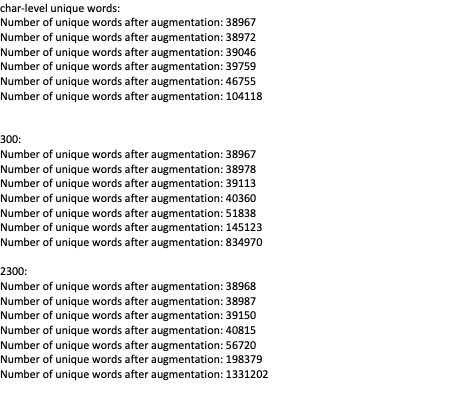  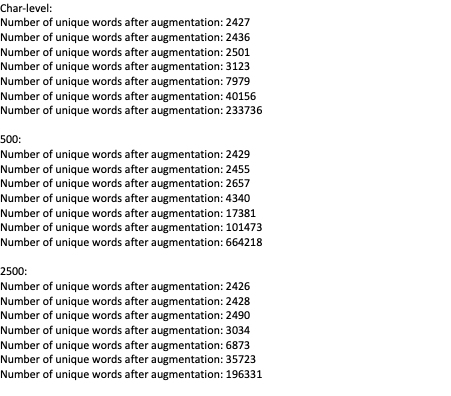

In [ ]:
#COMBINE ORIGINAL TRAIN DATA WITH DECODED RNNLM-GENERATED DATA:

for i in [10,100,1000,10000,100000,1000000,10000000]:
    path = 'textGeneration/2300/' + str(i) + '_og.txt'
    text_file = open(path, 'r')
    text = text_file.read()
    text_file.close()
    words_generated = text.split()
   
    text_file = open('data/bengali_train.txt', 'r')
    text = text_file.read()
    text_file.close()
    words_train = text.split()

    all_words = words_generated + words_train
    words_train = list(set(all_words))

    path_augmented = 'textGeneration/2300/' + 'vocab' + str(i) + '.txt'
    textfile = open(path_augmented, "w")
    for element in words_train:
        textfile.write(element + "\n")
    textfile.close()

    print('Number of unique words after augmentation:',len(words_train))

Calculating OOV rate and Plotting: \\

Bengali: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$  English: \\
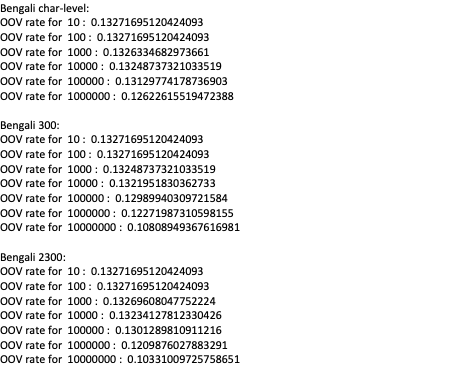  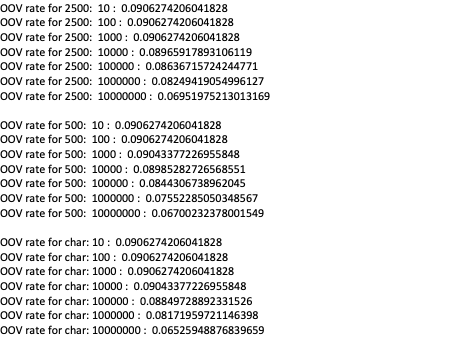

In [ ]:
#CALCULATE OOV RATES FOR AUGMENTED DATA

import string
from string import digits
import re
from collections import Counter
from nltk.tokenize import word_tokenize

def OOV(train, test):
    counts = Counter(train_text)
    counts_test = Counter(test_text)
    unk = {k:v for k,v in counts_test.items() if k not in counts}
    return((sum(unk.values()))/len(test_text))


test = open('data/bengali_test.txt').read()
for i in [10,100,1000,10000,100000,1000000,10000000]:
    path = 'textGeneration/2300/' + 'vocab' + str(i) + '.txt'
    text_file = open(path, 'r')
    train = text_file.read()
    text_file.close()
    train_text = word_tokenize(train)
    test_text = word_tokenize(test)
    x = OOV(train_text,test_text)
    print("OOV rate for ", str(i), ': ', x)

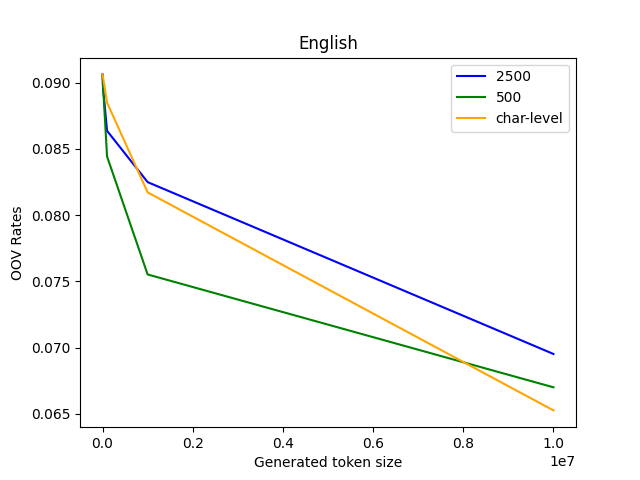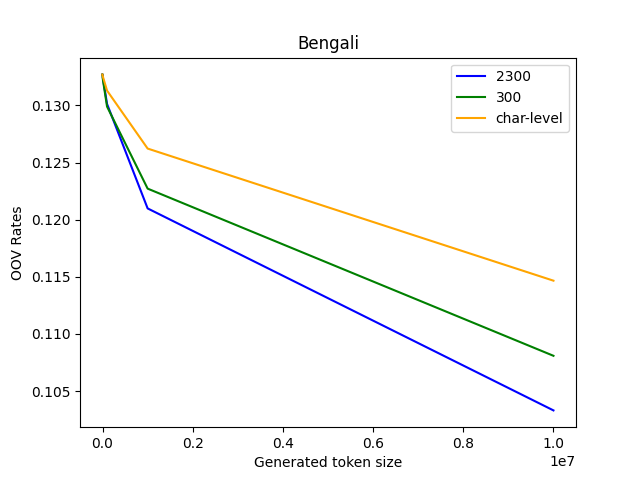



# 5.3 
We can see that the OOV rate decreases as the train is augmented with more generated vocabulary. This makes sense because there will be less unseen words. For both languages there is an elbow at $10^6$ showing that it takes a lot of words to decrease the OOV rate even slightly and overall we only see a decreasof about 3%. Thus there is diminishing returns for exponentially increasing vocabulary size. In practice we could use the $10^6$ or $10^7$ model because the size is still not too big but if we would continue to increase it exponentially we would run into time and space complexity issues and the small decrease in OOV rate would not be worth it.

## **6. Analysis**
**Task 1 - Preprocessing** \
The preprocessing is similar for both languages with only an extra line of code for Bengali to remove English text from the data. For both languages we lowercased everything and removed digits, extra punctuation, spaces, and newline characters and split into sentences based on end of sentence punctuation.

**Task 2 - Subword Segmentation** \
For English we chose vocab sizes of char-level, 500, and 2500 while for Bengli we did char-level, 300, and 2300. This was based on the manually inspecting the documents (for English) to see how coherent the segmentation, encoded, and decoded files were, and since bengali is more morphologically rich than English we decided to go with lower vocabulary sizes than that of English. For both languages we trained RNNLM models 100-3000 with step sizes of 100 for the vocabulary size parameter and compared their perplexity which also informed our choices.

**Task 3 - Hyperparamter Tuning and RNNLM** 

The hyperparameters were found by running a code similar to grid search.

It was observed that changing the class value has a significant change on the resulting perplexity. For character level models the best perplexity was found for class value of 2 and 1(which is equivalent to disabling class based model) for English and Bengali respectively, while higher class values close to 10 resulted in very bad perplexity. For the other two models for both languages it was found that a class higher class value closer to the vocabulary size results in better perplexity.

The number of hidden layers required for character level models was less compared to the other two models. For the small and large vocabulary size model 100 hidden layers resulted in the most suitable outputs. Increasing number of layer beyond 100 in some cases did show a little improvement but it was not that significant and also makes the implemntation slower. 

The bptt value does not follow any specific pattern. The same bptt value can give quite different result with different combinations of other hyperparameters so the best value was decided by observing the perplexity for different bptt values.

**Task 4 - Data Generation** \
While the char-level and 500-level model are mostly producing meaningless words, the 2500 model may not necessarily be producing new words but just repeating ones from the original vocabulary. Moreover, the words length of the words produced for each vocabulary size differs. Character level model generates words with very small length of words while larger vocabulary size has quite large words. Therefore in a practical scenario it will be wise to choose a vocabulary size which lies somewhere in the middle has a good range of word length. As we don't speak Bengali we cannot say for sure whether or not the segmentation is adequate without comparing OOV rates. \\

**Task 5 - OOV Rates** \
Interestingly, for Bengali the language model with size 2500 is best in terms of OOV rate while for English we see that the char-level and 500 language model produces better results. When looking at the generated data from earlier between models for English we could see that a lot of the words for the 2500 model added nonsense prefixes or suffixes to the words. Thus a lot of the generated words do not exist in English vocabulary and hence didn't help improve on our unseen vocabulary between test and train sets. However, Bengali which is more morphologically rich does better with the higher vocab-size models because these morphological additions do create actual words.

**Task 6 - Final thoughts** \
While it was good the OOV rates decreased as we supplemented it with more vocabulary, unfortunately neither language decreased significantly showing that our method of subword segmentation could be improved or suggesting that other ways of augmenting our vocabulary could work better. English's OOV rate was lower overall than Bengali but this isn't suprising because Bengali is a more morphologically rich language so there were more unique tokens and the original corpus for Bengali was much larger than English in the first place so we should expect to see more unseen tokens. Perhaps other techinques like stemming and lemmatization could further decrease the OOV rate for Bengali. 


